# E-CAM (version 1.0)
### editor: Jay

#### Import data

In [1]:
!unzip data.zip

Archive:  data.zip
   creating: level0/
  inflating: level0/001.png          
  inflating: level0/002.png          
  inflating: level0/003.png          
  inflating: level0/004.png          
  inflating: level0/005.png          
  inflating: level0/006.png          
  inflating: level0/007.png          
  inflating: level0/008.png          
  inflating: level0/009.png          
  inflating: level0/010.png          
  inflating: level0/011.png          
  inflating: level0/012.png          
  inflating: level0/013.png          
  inflating: level0/014.png          
  inflating: level0/015.png          
  inflating: level0/016.png          
  inflating: level0/017.png          
  inflating: level0/018.png          
  inflating: level0/019.png          
  inflating: level0/020.png          
  inflating: level0/021.png          
  inflating: level0/022.png          
  inflating: level0/023.png          
  inflating: level0/024.png          
  inflating: level0/025.png          
  inflatin

#### import libary

In [2]:
import os
import zipfile
import numpy as np
import pandas as pd

In [3]:
p0_dir = './level0'
p1_dir = './level1'
p2_dir = './level2'

p0_names = os.listdir(p0_dir)
p1_names = os.listdir(p1_dir)
p2_names = os.listdir(p2_dir)

In [4]:
print(p0_names)
print(p1_names)
print(p2_names)
print(len(p0_names))

['096.png', '105.png', '076.png', '075.png', '111.png', '094.png', '027.png', '064.png', '060.png', '126.png', '124.png', '078.png', '084.png', '119.png', '013.png', '059.png', '049.png', '041.png', '036.png', '102.png', '003.png', '010.png', '123.png', '002.png', '034.png', '057.png', '037.png', '121.png', '031.png', '117.png', '062.png', '026.png', '052.png', '129.png', '053.png', '087.png', '082.png', '113.png', '021.png', '056.png', '039.png', '089.png', '079.png', '112.png', '035.png', '100.png', '092.png', '042.png', '012.png', '017.png', '116.png', '022.png', '091.png', '083.png', '086.png', '114.png', '125.png', '070.png', '015.png', '071.png', '099.png', '085.png', '069.png', '066.png', '095.png', '029.png', '067.png', '077.png', '090.png', '109.png', '088.png', '118.png', '127.png', '072.png', '028.png', '008.png', '032.png', '019.png', '005.png', '006.png', '043.png', '004.png', '014.png', '080.png', '063.png', '104.png', '081.png', '044.png', '103.png', '115.png', '108.png'

In [5]:
x_train = np.empty((0, 224, 224, 3), float)
y_train = np.empty(0, dtype=int)

x_test = np.empty((0, 224, 224, 3), float)
y_test = np.empty(0, dtype=int)

In [6]:
test_num = 9

In [7]:
from PIL import Image

for j, i in enumerate(p0_names):
  img = Image.open('./level0/' + str(i)).convert('RGB')
  img = np.array(img)
  img = img.reshape((1, 224, 224, 3))
  if j >= len(p0_names) - 9:
    x_test = np.append(x_test, img, axis=0)
    y_test = np.append(y_test, 0)
  else:
    x_train = np.append(x_train, img, axis=0)
    y_train = np.append(y_train, 0)


In [8]:
for j, i in enumerate(p1_names):
  img = Image.open('./level1/' + str(i)).convert('RGB')
  img = np.array(img)
  img = img.reshape((1, 224, 224, 3))
  if j >= len(p1_names) - 9:
    x_test = np.append(x_test, img, axis=0)
    y_test = np.append(y_test, 1)
  else:
    x_train = np.append(x_train, img, axis=0)
    y_train = np.append(y_train, 1)

In [9]:
for j, i in enumerate(p2_names):
  img = Image.open('./level2/' + str(i)).convert('RGB')
  img = np.array(img)
  img = img.reshape((1, 224, 224, 3))
  if j >= len(p2_names) - 9:
    x_test = np.append(x_test, img, axis=0)
    y_test = np.append(y_test, 2)
  else:
    x_train = np.append(x_train, img, axis=0)
    y_train = np.append(y_train, 2)

In [10]:
print(x_train.shape)

(322, 224, 224, 3)


In [11]:
print(y_train.shape)

(322,)


In [12]:
print(x_test.shape)

(27, 224, 224, 3)


In [13]:
print(y_test.shape)

(27,)


In [14]:
x_train /= 255
x_test /= 255

In [42]:
import keras
import tensorflow as tf
tf.test.gpu_device_name()
tf.config.list_physical_devices('GPU')

from sklearn.utils import class_weight, shuffle
from tensorflow.keras.utils import to_categorical
from keras import applications
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [43]:
base_model = applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(
        224,
        224,
        3
        )
    )

In [44]:
from keras import backend as K

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall

In [45]:
from tensorflow.keras.optimizers import SGD

def build_model():
  add_model = Sequential()
  add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
  add_model.add(Dense(224, activation='relu')) 
  add_model.add(Dense(3, activation='softmax'))

  model = Model(
    inputs=base_model.input,
    outputs=add_model(base_model.output)
    )
  
  # learning_rate = 1e-4 = 0.0001
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy', recall])
  model.summary()

  return model

In [46]:
batch_size_4 = 4
batch_size_8 = 8
batch_size_16 = 16
batch_size_32 = 32

epochs = 30
model_1 = build_model()
model_2 = build_model()
model_3 = build_model()
model_4 = build_model()


history1 = model_1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size_4, validation_data=(x_test, y_test))
history2 = model_2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size_8, validation_data=(x_test, y_test))
history3 = model_3.fit(x_train, y_train, epochs=epochs, batch_size=batch_size_16, validation_data=(x_test, y_test))
history4 = model_4.fit(x_train, y_train, epochs=epochs, batch_size=batch_size_32, validation_data=(x_test, y_test))


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

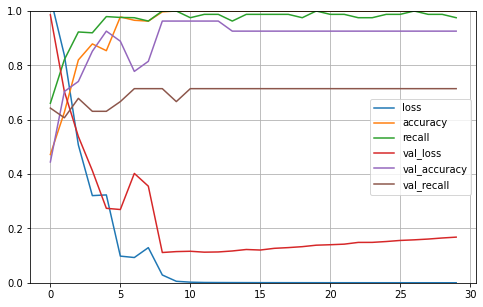

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

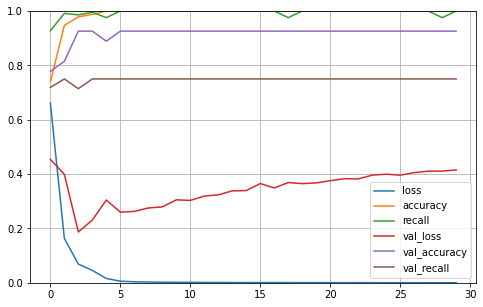

In [48]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

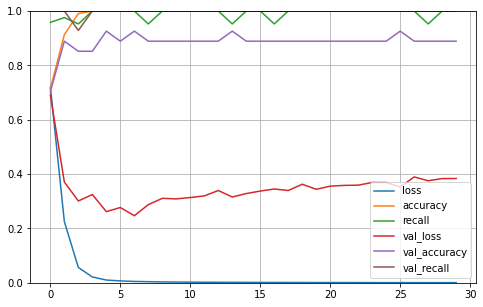

In [49]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

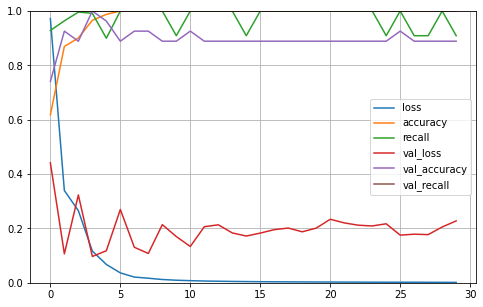

In [50]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()